In [1]:
import pandas as pd
import numpy as np
# train_test
train = pd.read_table('./train/subsidy_train.txt',sep=',',header=None)
train.columns = ['id','money']
test = pd.read_table('./test/studentID_test.txt',sep=',',header=None)
test.columns = ['id']
test['money'] = np.nan
train_test = pd.concat([train,test])
train_test.head()

,id,money
0,0,0.0
1,1,0.0
2,8,0.0
3,9,0.0
4,10,0.0


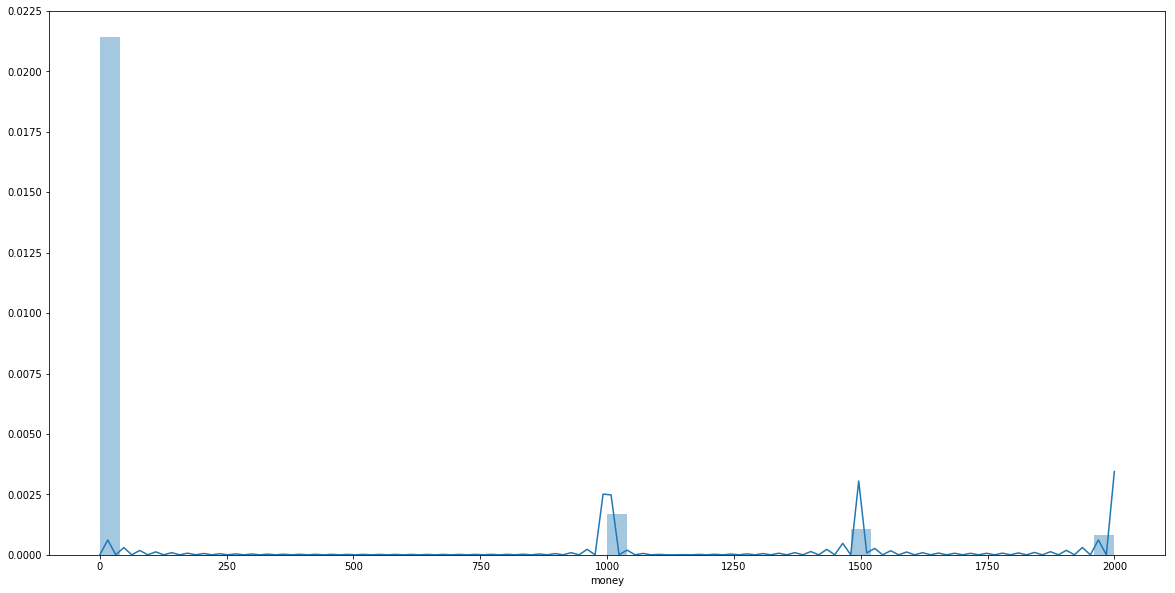

In [2]:
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
plt.figure(figsize=(20,10))
sns.distplot(train['money'],kde=True)
plt.show()

In [3]:
# score/ paiming
score_train = pd.read_table('./train/score_train.txt',sep=',',header=None)
score_train.columns = ['id','college','score']
score_test = pd.read_table('./test/score_test.txt',sep=',',header=None)
score_test.columns = ['id','college','score']
score_train_test = pd.concat([score_train,score_test])
college = pd.DataFrame(score_train_test.groupby(['college'])['score'].max())
college.to_csv('./college.csv',index=True)
college = pd.read_csv('./college.csv')
college.columns = ['college','num']
score_train_test = pd.merge(score_train_test, college, how='left',on='college')
score_train_test['order'] = score_train_test['score']/score_train_test['num']
train_test = pd.merge(train_test,score_train_test,how='left',on='id')
train_test.head()

,id,money,college,score,num,order
0,0,0.0,9.0,1.0,2933.0,0.000341
1,1,0.0,9.0,2.0,2933.0,0.000682
2,8,0.0,6.0,1565.0,1570.0,0.996815
3,9,0.0,6.0,1570.0,1570.0,1.000000
4,10,0.0,3.0,1.0,2304.0,0.000434


In [4]:
# card
card_train = pd.read_table('./train/card_train.txt',sep=',',header=-1)
card_train.columns = ['id','consume','where','how','time','amount','remainder']
card_test = pd.read_table('./test/card_test.txt',sep=',',header=-1)
card_test.columns = ['id','consume','where','how','time','amount','remainder']
card_train_test = pd.concat([card_train,card_test])
card_train_test.head()

,id,consume,where,how,time,amount,remainder
0,1006,POS消费,地点551,淋浴,2013/09/01 00:00:32,0.50,124.90
1,1006,POS消费,地点551,淋浴,2013/09/01 00:00:32,0.50,124.90
2,1968,POS消费,地点159,淋浴,2013/09/01 00:00:39,0.10,200.14
3,1968,POS消费,地点159,淋浴,2013/09/01 00:00:39,0.10,200.14
4,1406,POS消费,地点660,开水,2013/09/01 00:00:40,0.01,374.42


In [5]:
card1 = pd.DataFrame(card_train_test.groupby(['id'])['consume'].count())
card1['consumesum'] = card_train_test.groupby(['id'])['amount'].sum()
card1['consumeavg'] = card_train_test.groupby(['id'])['amount'].mean()
card1['consumemax'] = card_train_test.groupby(['id'])['amount'].max()
card1['remaindersum'] = card_train_test.groupby(['id'])['remainder'].sum()
card1['remainderavg'] = card_train_test.groupby(['id'])['remainder'].mean()
card1['remaindermax'] = card_train_test.groupby(['id'])['remainder'].max()
card1.to_csv('./card1.csv',index=True)
card1 = pd.read_csv('./card1.csv')
card1.head()

,id,consume,consumesum,consumeavg,consumemax,remaindersum,remainderavg,remaindermax
0,0,628,4997.56,7.833166,200.0,42895.96,67.235047,228.98
1,1,687,6182.69,8.960420,300.0,70664.31,102.412043,302.41
2,2,915,4966.65,5.380986,300.0,46461.50,50.337486,300.00
3,3,58,42.40,0.731034,3.6,1186.93,20.464310,38.80
4,8,1330,11472.37,8.625842,200.0,117836.74,88.599053,231.26


In [6]:
#首先，使用groupby，指定首先按照id进行分组，再按照how列进行分组，
#对于分#组后的数据，我们取amount列，并进行加总处理
#card_group=card_train_test.pivot_table('amount',index=['id'],columns=['how'],aggfunc=sum)
#card_group['zongji']=card_group.sum(axis=1,skipna=False)
#card_group['engeer']=card_group['食堂']/card_group['zongji']
#print(card_group.head())
card2=card_train_test.groupby(['id','how'])['amount'].sum()
card2=card2.unstack('how')
#用0替换NaN值，同时直接覆盖原DataFrame
card2.fillna(0,inplace=True)
print(card2.head())
card2['zongji']=card2.sum(axis=1,skipna=False)
card2['engeer']=card2['食堂']/card2['zongji']
card2.to_csv('./card2.csv',index=True,columns=None)
card2 = pd.read_csv('./card2.csv', encoding='utf-8')
card = pd.merge(card1, card2, how = 'left', on ='id')
train_test = pd.merge(train_test, card, how='left',on='id')
train_test.head()

how    其他    图书馆       开水   教务处  文印中心  校医院       校车    洗衣房     淋浴      超市  \
id                                                                          
0    0.00   84.4   429.58   0.0   0.3  0.0   417.49   0.00  12.30  839.68   
1    0.00  324.2   265.97  29.3  96.4  0.0   119.40  25.02  22.50  514.30   
2    0.01   22.4   670.36   0.0   0.0  0.0    34.88  22.20  53.10  829.95   
3    0.00    0.0     0.18   0.0   0.0  0.0     0.00   7.62  34.60    0.00   
8    0.00  425.9  2440.94   0.0   2.6  0.0  2211.45   4.50  39.83   10.00   

how       食堂  
id            
0     647.81  
1    1540.60  
2     801.75  
3       0.00  
8     387.15  


,id,money,college,score,num,order,consume,consumesum,consumeavg,consumemax,...,教务处,文印中心,校医院,校车,洗衣房,淋浴,超市,食堂,zongji,engeer
0,0,0.0,9.0,1.0,2933.0,0.000341,628.0,4997.56,7.833166,200.0,...,0.0,0.3,0.0,417.49,0.00,12.30,839.68,647.81,2431.56,0.266417
1,1,0.0,9.0,2.0,2933.0,0.000682,687.0,6182.69,8.960420,300.0,...,29.3,96.4,0.0,119.40,25.02,22.50,514.30,1540.60,2937.69,0.524426
2,8,0.0,6.0,1565.0,1570.0,0.996815,1330.0,11472.37,8.625842,200.0,...,0.0,2.6,0.0,2211.45,4.50,39.83,10.00,387.15,5522.37,0.070106
3,9,0.0,6.0,1570.0,1570.0,1.000000,1618.0,14502.91,8.963480,200.0,...,0.0,294.4,0.0,158.10,23.82,36.32,0.00,1899.60,7402.91,0.256602
4,10,0.0,3.0,1.0,2304.0,0.000434,847.0,6028.74,7.084301,200.0,...,1.3,0.0,0.0,486.30,65.36,143.90,242.80,944.84,2907.44,0.324973


In [62]:
#library
library_train =pd.read_csv('./train/library_train.txt',header=None)
library_train.columns=['id','gate','time_stamp']
library_test = pd.read_csv('./test/library_test.txt',header=None)
library_test.columns=['id','gate','time_stamp']
library_train_test = pd.concat([library_train,library_test])
library_train_test.head(10)

,id,gate,time_stamp
0,3684,5,2013/09/01 08:42:50
1,14314,6,2013/09/01 08:42:59
2,5108,9,2013/09/01 08:43:32
3,5826,7,2013/09/01 08:44:06
4,7730,5,2013/09/01 08:44:25
5,6668,7,2013/09/01 08:47:24
6,11636,8,2013/09/01 08:48:24
7,4036,6,2013/09/01 08:49:53
8,4050,5,2013/09/01 08:50:01
9,7434,5,2013/09/01 08:50:08


In [63]:
#只需要截取其中的年月日信息
library_train_test['time_stamp']=library_train_test['time_stamp'].str[:10]
library_train_test.drop_duplicates(['id','time_stamp'],keep='last',inplace=True)
print(library_train_test[library_train_test['id']==0])
#统计天数
library_count_train_test=library_train_test.groupby(['id'])['time_stamp'].count()
library_count_train_test.to_csv('library.csv')
library = pd.read_csv('./library.csv')
library.columns = ['id','time_stamp']
library.fillna(0,inplace=True)
train_test = pd.merge(train_test, library, how='left',on='id')
train_test.head()

        id gate  time_stamp
14925    0    7  2013/10/15
15790    0    7  2013/10/17
17394    0    6  2013/10/21
17838    0    8  2013/10/22
20000    0    6  2013/10/27
23869    0    4  2013/11/04
24550    0    5  2013/11/05
33365    0    7  2013/11/20
44954    0    5  2013/12/10
49583    0    7  2013/12/17
70052    0    5  2014/01/03
79702    0    6  2014/01/09
161664   0  进门1  2014/03/25


,id,money,college,score,num,order,consume,consumesum,consumeavg,consumemax,...,文印中心,校医院,校车,洗衣房,淋浴,超市,食堂,zongji,engeer,time_stamp
0,0,0.0,9.0,1.0,2933.0,0.000341,628.0,4997.56,7.833166,200.0,...,0.3,0.0,417.49,0.00,12.30,839.68,647.81,2431.56,0.266417,NaN
1,1,0.0,9.0,2.0,2933.0,0.000682,687.0,6182.69,8.960420,300.0,...,96.4,0.0,119.40,25.02,22.50,514.30,1540.60,2937.69,0.524426,1.0
2,8,0.0,6.0,1565.0,1570.0,0.996815,1330.0,11472.37,8.625842,200.0,...,2.6,0.0,2211.45,4.50,39.83,10.00,387.15,5522.37,0.070106,NaN
3,9,0.0,6.0,1570.0,1570.0,1.000000,1618.0,14502.91,8.963480,200.0,...,294.4,0.0,158.10,23.82,36.32,0.00,1899.60,7402.91,0.256602,NaN
4,10,0.0,3.0,1.0,2304.0,0.000434,847.0,6028.74,7.084301,200.0,...,0.0,0.0,486.30,65.36,143.90,242.80,944.84,2907.44,0.324973,3.0


In [64]:
train = train_test[train_test['money'].notnull()]
test = train_test[train_test['money'].isnull()]
train = train.fillna(-1)
test = test.fillna(-1)

In [65]:
# Oversample
Oversampling1000 = train.loc[train.money == 1000]
Oversampling1500 = train.loc[train.money == 1500]
Oversampling2000 = train.loc[train.money == 2000]
for i in range(5):
    train = train.append(Oversampling1000)
for j in range(8):
    train = train.append(Oversampling1500)
for k in range(10):
    train = train.append(Oversampling2000)

train.to_csv('./train.csv')
test.to_csv('./test.csv')